# Проблема регрессии

Автор: Ким Антон

### Анализ делал исключительно в образовательных целях (практиковался). Все ресурсы и тему брал у соревнования на Kaggle

В ходе проекта решается задача прогнозирования цены продажи домов.  
Задача регрессии, цель уменьшить разброс при вычислении цены.

Источник данных и задачи: https://www.kaggle.com/c/home-data-for-ml-course
## Признаки

1) MSSubClass: класс здания
2) MSZoning: общая классификация зонирования
3) LotFrontage: Линейные ноги улицы, связанные с собственностью
4) LotArea: размер лота в квадратных футах
5) Street: Тип подъездной дороги
6) Alley: Тип доступа к аллее
7) LotShape: общая форма собственности
8) LandContour: плоскостность собственности
9) Utilities: Тип доступных утилит
10) LotConfig: конфигурация лота
11) LandSlope: Склон собственности
12) Neigborhood: Физические местоположения в пределах города Эймса
13) Condition1: Близость к главной дороге или железной дороге
14) Condition2: Близость к главной дороге или железной дороге (если есть секунда)
15) BldgType: Тип жилья
16) HouseStyle: Стиль жилья
17) GeneralQual: общий материал и качество отделки
18) AllCond: Общий рейтинг состояния
19) YearBuilt: первоначальная дата строительства
20) YearRemodAdd: Изменить дату
21) RoofStyle: Тип крыши
22) RoofMatl: материал крыши
23) Exterior1st: Внешнее покрытие дома
24) Exterior2nd: Внешнее покрытие дома (если более одного материала)
25) MasVnrType: Кирпичный тип шпона
26) MasVnrArea: площадь шпона в квадратных футах
27) ExterQual: качество материала экстерьера
28) ExterCond: текущее состояние материала снаружи
29) Base: Тип основания
30) BsmtQual: высота подвала
31) BsmtCond: общее состояние подвала
32) BsmtExposure: Подвал или стены подвала на уровне сада
33) BsmtFinType1: качество подвального помещения
34) BsmtFinSF1: тип 1 готовые квадратные футы
35) BsmtFinType2: качество второй готовой области (если есть)
36) BsmtFinSF2: Тип 2 готовые квадратные футы
37) BsmtUnfSF: Незаконченные квадратные футы подвальной площади
38) TotalBsmtSF: Общая площадь подвала
39) Heating: Тип отопления
40) HeatingQC: качество и состояние отопления
41) CentralAir: центральное кондиционирование
42) Electricity: Электрическая система
43) 1stFlrSF: Первый этаж квадратных футов
44) 2ndFlrSF: Второй этаж квадратных футов
45) LowQualFinSF: Низкое качество готовых квадратных футов (все этажи)
46) GrLivArea: Квадратные футы жилой площади над землей
47) BsmtFullBath: Подвал полные ванные комнаты
48) BsmtHalfBath: Подвальная половина ванных комнат
49) FullBath: полные ванные комнаты выше класса
50) HalfBath: половина ванны выше класса
51) Bedroom: Количество спален выше уровня подвала
52) Kitchen: Количество кухонь
53) KitchenQual: качество кухни
54) TotRmsAbvGrd: Общее количество комнат выше класса (не включает ванные комнаты)
55) Functional: Рейтинг функциональности дома
56) Camen: Количество каминов
57) CamenQu: Качество камина
58) GarageType: расположение гаража
59) GarageYrBlt: Год гараж был построен
60) GarageFinish: внутренняя отделка гаража
61) GarageCars: размер гаража в вместимости автомобиля
62) GarageArea: размер гаража в квадратных футах
63) GarageQual: качество гаража
64) GarageCond: Состояние гаража
65) PavedDrive: асфальтированная дорога
66) WoodDeckSF: площадь деревянного настила в квадратных футах
67) OpenPorchSF: площадь открытого крыльца в квадратных футах
68) CloseArea: площадь закрытого крыльца в квадратных футах
69) 3SsnPorch: три сезона крыльцо в квадратных футах
70) ScreenPorch: площадь крыльца экрана в квадратных футах
71) PoolArea: площадь бассейна в квадратных футах
72) PoolQC: качество бассейна
73) Забор: качество забора
74) MiscFeature: Разная особенность, не включенная в другие категории
75) MiscVal: Значение разных функций
76) MoSold: месяц продан
77) YrSold: год продан
78) SaleType: Тип продажи
79) SaleCondition: условия продажи 

80) SalePrice: прогнозируемый признак

# Начальный Сетап

In [353]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import warnings
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')

# Краткий обзор

In [354]:
train_df = pd.read_csv('data/train_sales.csv')
test_df = pd.read_csv('data/test_sales.csv')

In [355]:
train_df.shape, test_df.shape

((1460, 81), (1459, 80))

In [356]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [357]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Проверка на цельность

In [358]:
for col in train_df.columns:
    if train_df[col].isnull().any():
        print(col, train_df[col].isnull().sum())

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


Данные рванные, много пропусков

In [359]:
# Удаляю строки без ключа
train_df.dropna(axis=0, subset=['SalePrice'], inplace=True)

## Числовые признаки

In [360]:
numerical = train_df.drop(['Id', 'SalePrice'], axis=1).select_dtypes(include=['float64', 'int64']).columns

numerical = [cname for cname in numerical if
                    train_df[cname].nunique() > 10]
train_df[numerical].describe()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,6.517808,1978.506164,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,43.489041,6.321918
std,42.300571,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,1.625393,24.689725,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,496.123024,2.703626
min,20.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,2.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,20.000000,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,5.000000,1961.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,50.000000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,6.000000,1980.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,70.000000,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,7.000000,2002.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,190.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,14.000000,2010.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,15500.000000,12.000000


Сразу заметны серьезные выбросы LotArea, 1stFlrSF и GrLivArea

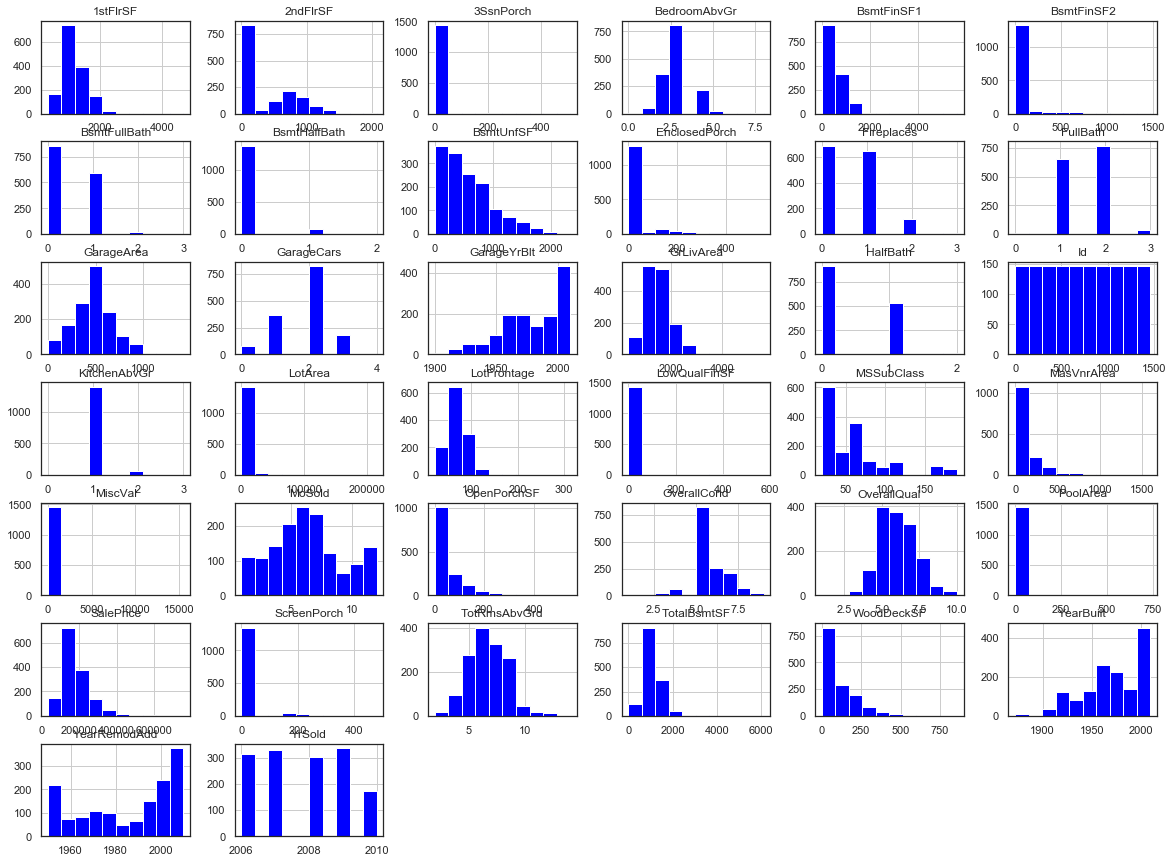

In [361]:
train_df.select_dtypes(['float64', 'int64']).hist(figsize=(20, 15), color='blue');

Множество признаков имеют одно доминирующее значение

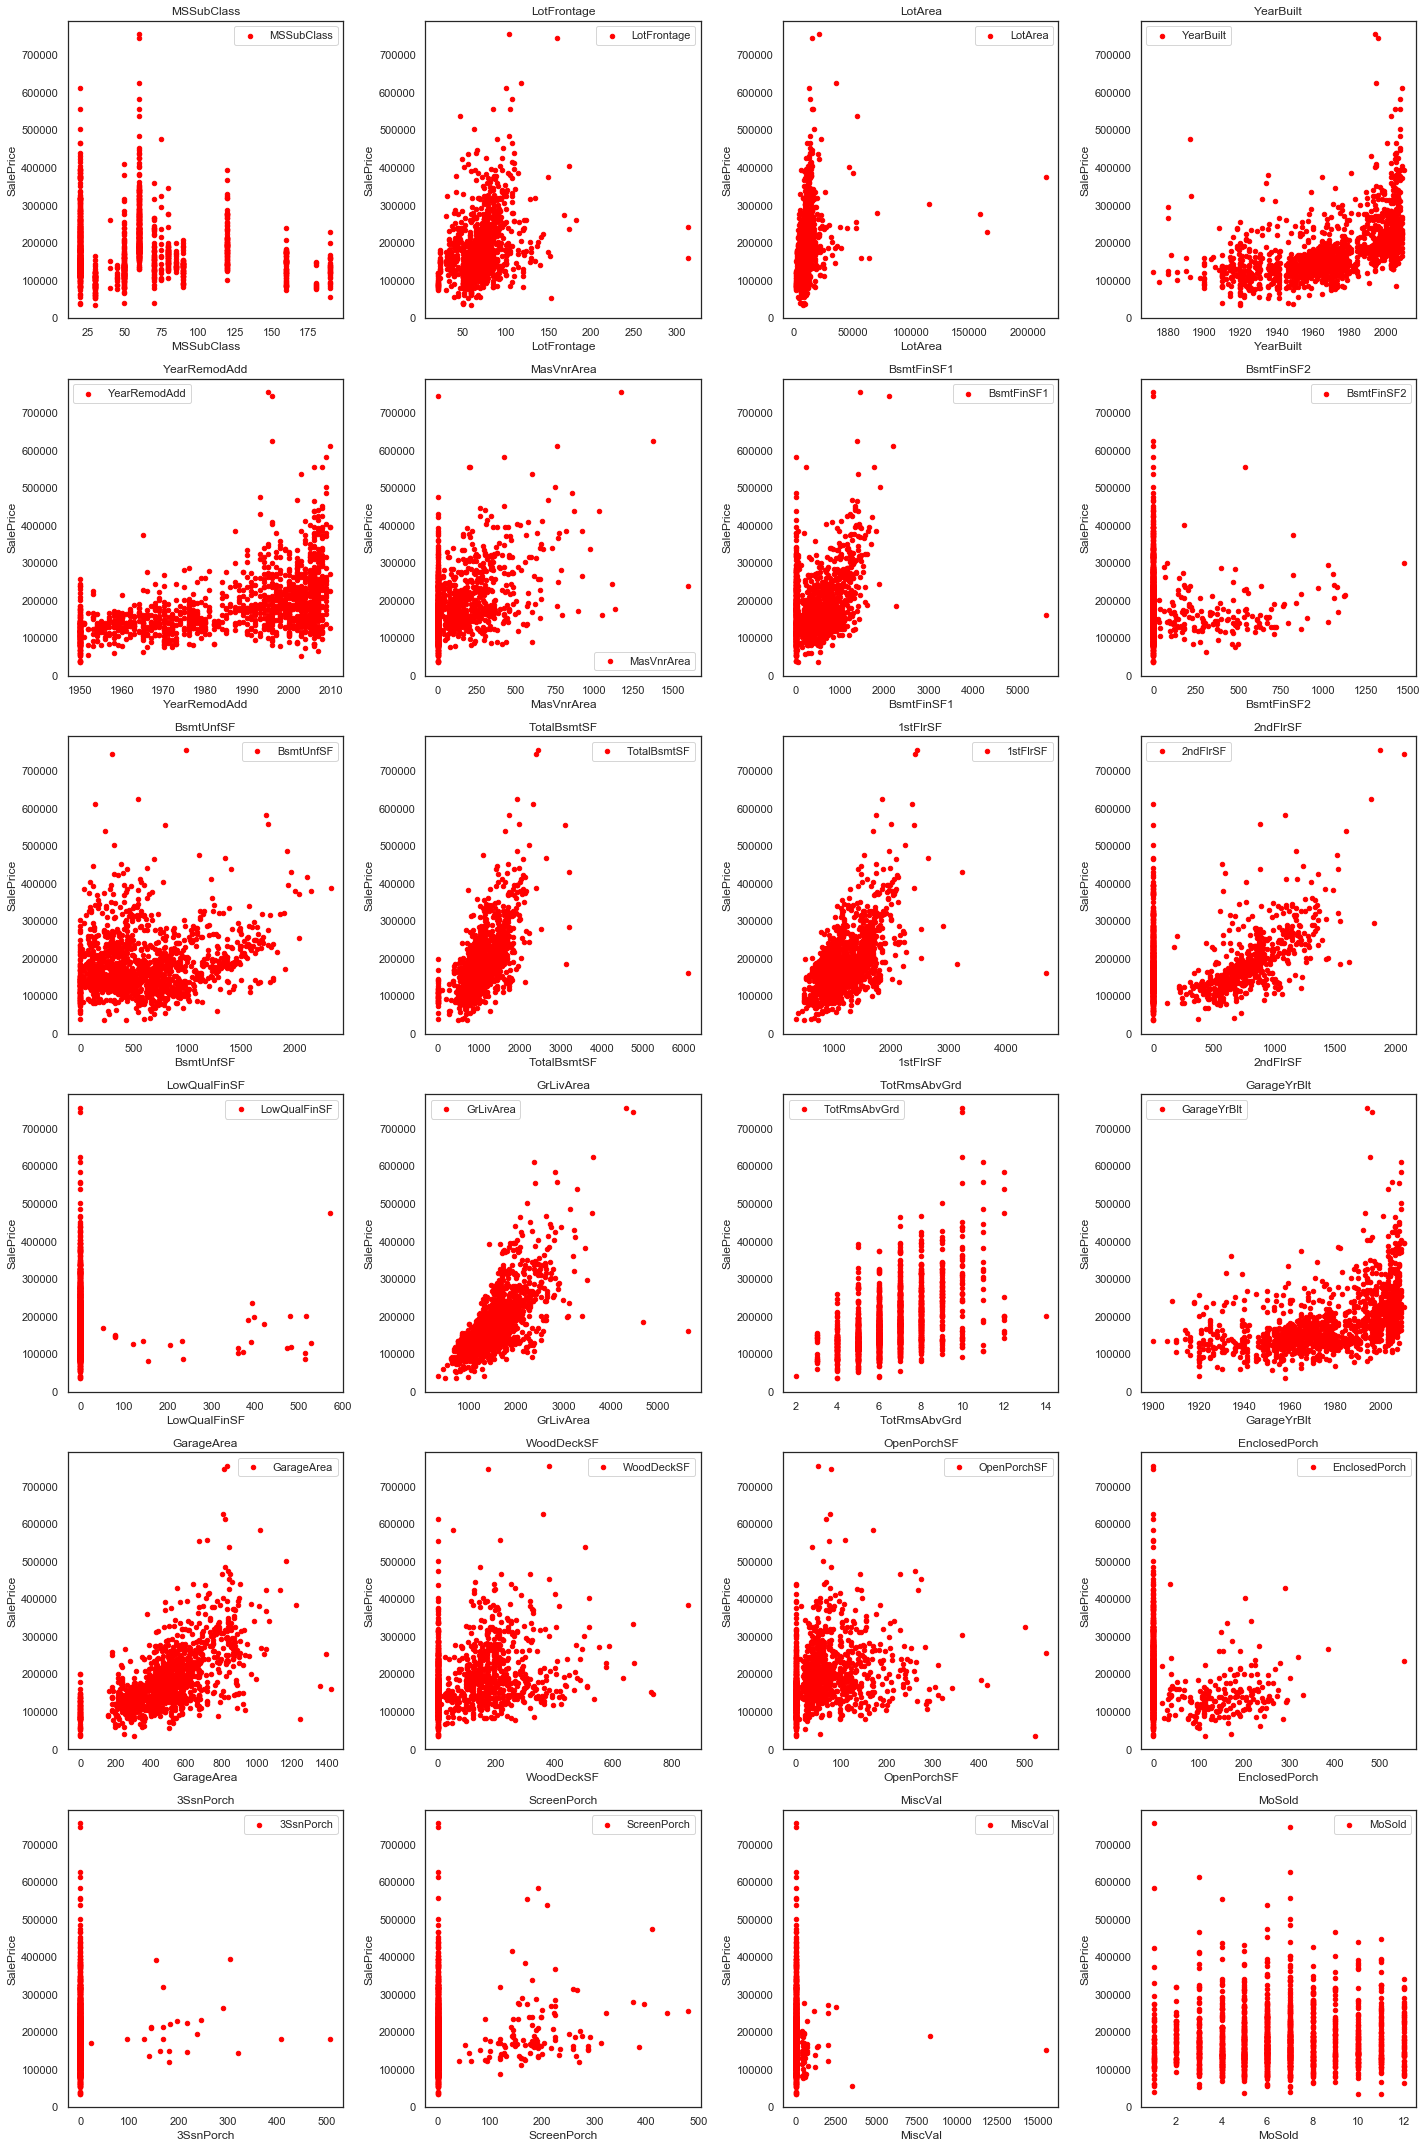

In [362]:
fig, axes = plt.subplots(ncols=4, nrows = 6, figsize=(20, 30))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

for i in range(len(numerical)):
    train_df.plot(x=numerical[i], y = 'SalePrice', label=numerical[i], ax=axes[i//4, i%4], kind='scatter', color='red')
    axes[i//4, i%4].set_title(numerical[i])
plt.tight_layout()

## Проверка на значимость признака корреляцией

In [437]:
cortab = train_df.drop('Id', axis=1).corr()
cor_coef = cortab['SalePrice'].sort_values()
top_num_feat = list(cor_coef.drop("SalePrice").index)

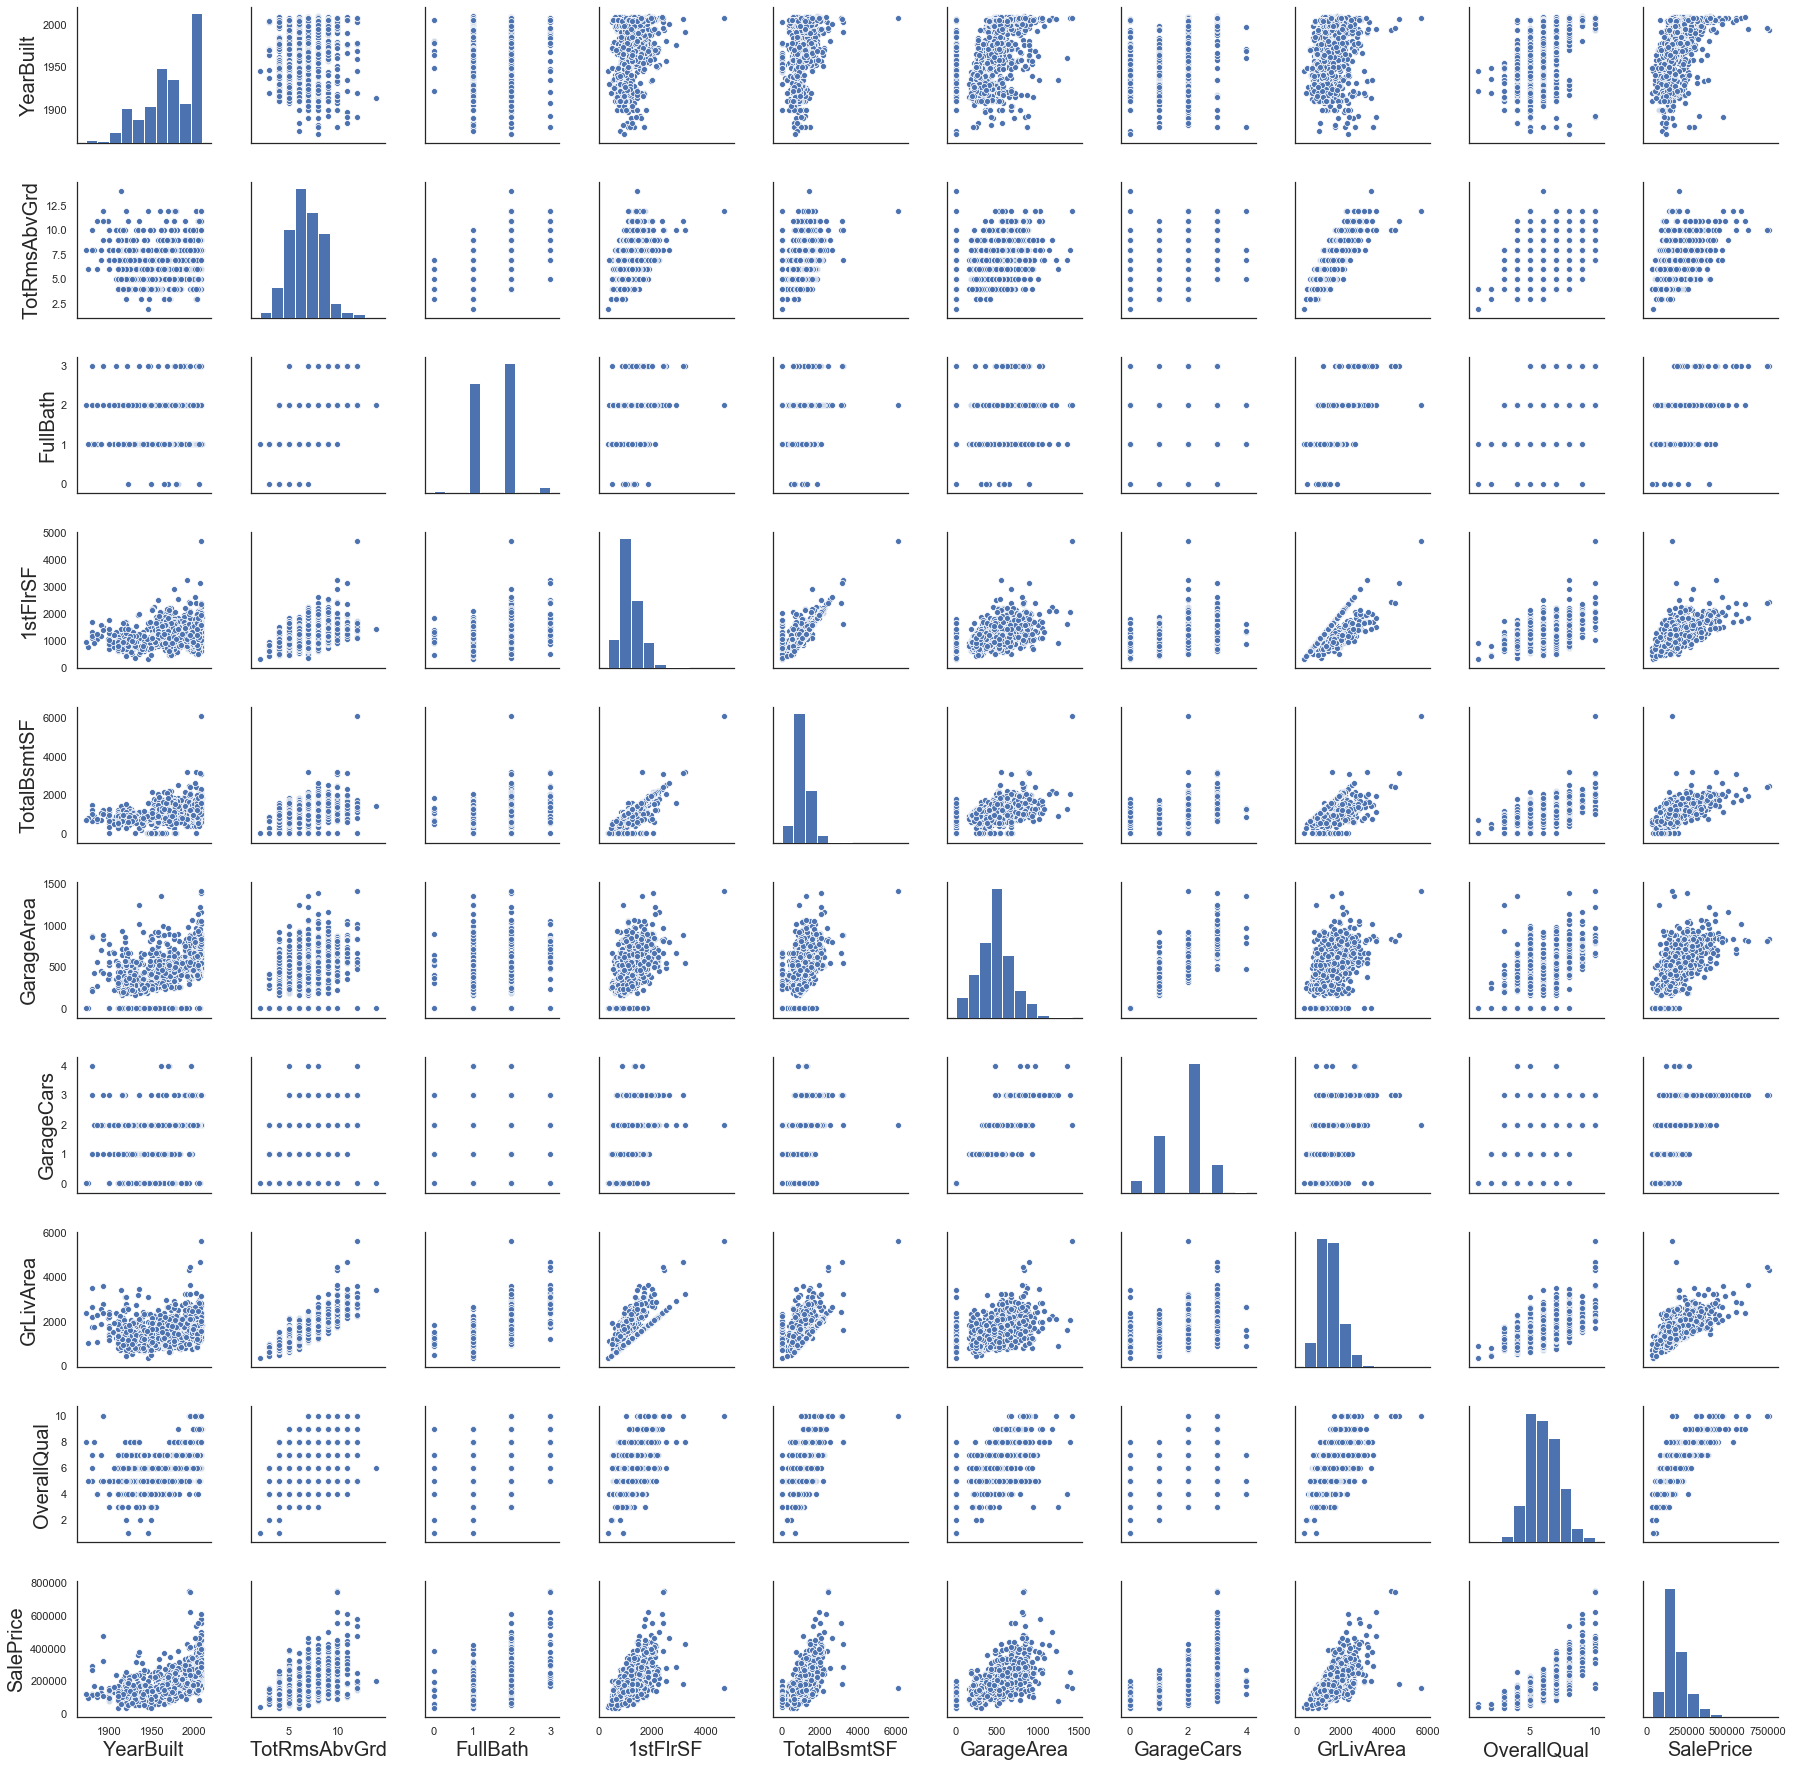

In [330]:
sns.pairplot(train_df[top_num_feat]);

Довольно значимые признаки

## Категориальные признаки

In [364]:
categorical = [cname for cname in train_df.columns if
                    train_df[cname].nunique() <= 10 or
                   train_df[cname].dtype == "object"]

train_df.describe(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


Есть практически пустые признаки как: PoolQC, Fence, MiscFeature ...

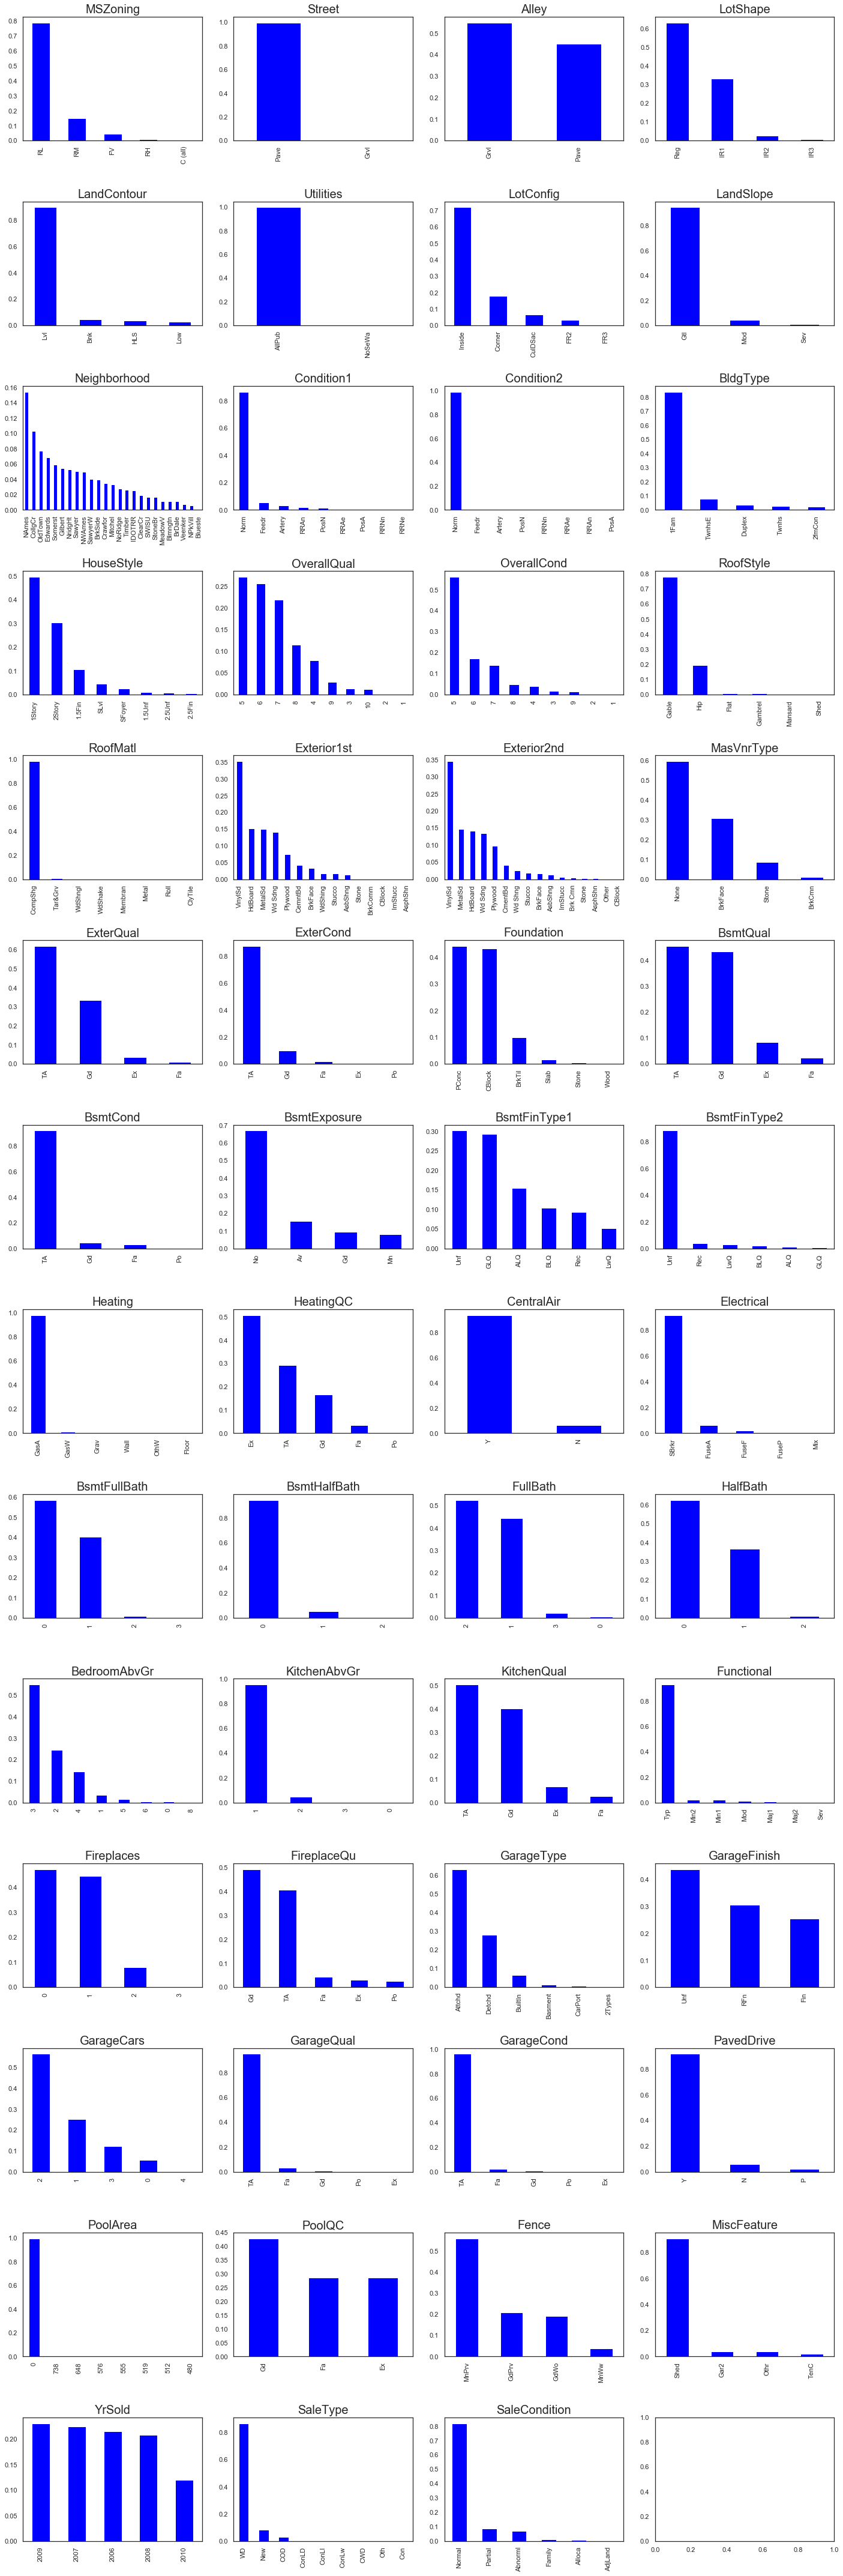

In [365]:
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 20

fig, axes = plt.subplots(ncols=4, nrows = 14, figsize=(20, 60))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

for i in range(len(categorical)):
    train_df[categorical[i]].value_counts(normalize=True).plot(kind='bar', label=categorical[i], ax=axes[i//4, i%4], color='blue')
    axes[i//4, i%4].set_title(categorical[i])
plt.tight_layout()

Ситуация идентична с числовыми. Много явно выраженных пик

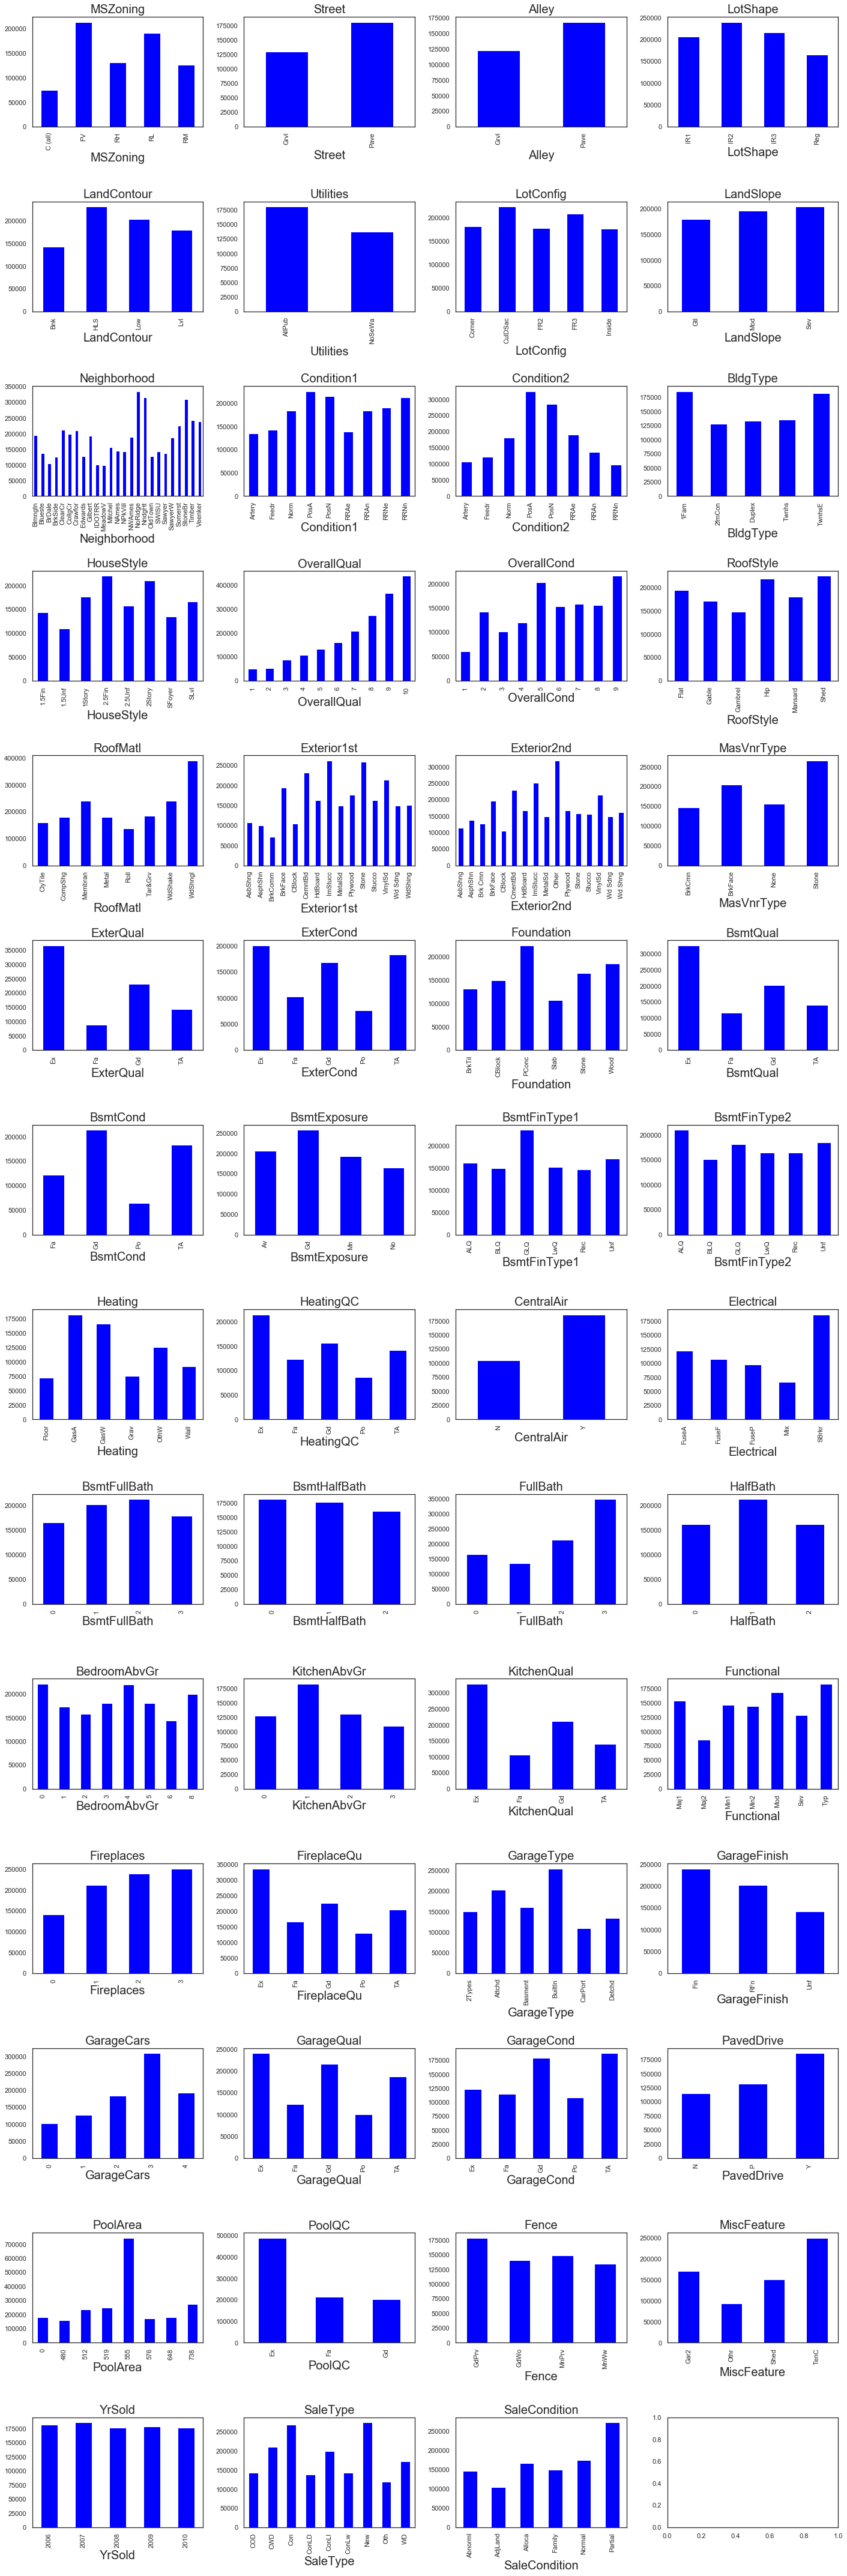

In [366]:
fig, axes = plt.subplots(ncols=4, nrows = 14, figsize=(20, 60))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

for i in range(len(categorical)):
    train_df.groupby(categorical[i])['SalePrice'].mean().plot(kind='bar', ax=axes[i//4, i%4], color='blue')
    axes[i//4, i%4].set_title(categorical[i])

plt.tight_layout()

Сразу видно что большое количество признаков не имеют никакого воздействия на целевой

## Проверка признаков на качество

In [367]:
cat_dic = {}
for cat in categorical:
    cat_dic[cat] = np.round(100*(train_df.groupby(cat)['SalePrice'].mean()).std()/(train_df.groupby(cat)['SalePrice'].mean()).sum(), 3)

Отбераю топ 10

In [436]:
top_cat_feat = list(dict(sorted(cat_dic.items(), key=lambda x: x[1], reverse=True)).keys())

## Предобработка

Селекция признаков завершена, теперь принимаюсь за обработку данных

In [438]:
my_cols = top_cat_feat + top_num_feat

X = train_df[my_cols]
X.fillna(0)
y = train_df['SalePrice']
X_test = test_df[my_cols]
X_test.fillna(0)

,CentralAir,PoolQC,ExterQual,KitchenQual,BsmtQual,Street,BsmtCond,Alley,FullBath,MiscFeature,Utilities,PoolArea,GarageCars,PavedDrive,GarageFinish,Electrical,MSZoning,ExterCond,FireplaceQu,OverallQual,MasVnrType,GarageQual,Heating,HeatingQC,Fireplaces,Condition2,KitchenAbvGr,SaleCondition,HalfBath,GarageCond,GarageType,LandContour,BsmtExposure,RoofMatl,Foundation,LotShape,BldgType,OverallCond,SaleType,BsmtFinType1,Fence,Functional,BsmtFullBath,HouseStyle,RoofStyle,Exterior1st,LotConfig,LandSlope,Condition1,BsmtHalfBath,Exterior2nd,BsmtFinType2,BedroomAbvGr,Neighborhood,YrSold,KitchenAbvGr,EnclosedPorch,MSSubClass,OverallCond,YrSold,LowQualFinSF,MiscVal,BsmtHalfBath,BsmtFinSF2,3SsnPorch,MoSold,PoolArea,ScreenPorch,BedroomAbvGr,BsmtUnfSF,BsmtFullBath,LotArea,HalfBath,OpenPorchSF,2ndFlrSF,WoodDeckSF,LotFrontage,BsmtFinSF1,Fireplaces,MasVnrArea,GarageYrBlt,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual
0,Y,0,TA,TA,TA,Pave,TA,0,1,0,AllPub,0,1.0,Y,Unf,SBrkr,RH,TA,0,5,None,TA,GasA,TA,0,Norm,1,Normal,0,TA,Attchd,Lvl,No,CompShg,CBlock,Reg,1Fam,6,WD,Rec,MnPrv,Typ,0.0,1Story,Gable,VinylSd,Inside,Gtl,Feedr,0.0,VinylSd,LwQ,2,NAmes,2010,1,0,20,6,2010,0,0,0.0,144.0,0,6,0,120,2,270.0,0.0,11622,0,0,0,140,80.0,468.0,0,0.0,1961.0,1961,1961,5,1,896,882.0,730.0,1.0,896,5
1,Y,0,TA,Gd,TA,Pave,TA,0,1,Gar2,AllPub,0,1.0,Y,Unf,SBrkr,RL,TA,0,6,BrkFace,TA,GasA,TA,0,Norm,1,Normal,1,TA,Attchd,Lvl,No,CompShg,CBlock,IR1,1Fam,6,WD,ALQ,0,Typ,0.0,1Story,Hip,Wd Sdng,Corner,Gtl,Norm,0.0,Wd Sdng,Unf,3,NAmes,2010,1,0,20,6,2010,0,12500,0.0,0.0,0,6,0,0,3,406.0,0.0,14267,1,36,0,393,81.0,923.0,0,108.0,1958.0,1958,1958,6,1,1329,1329.0,312.0,1.0,1329,6
2,Y,0,TA,TA,Gd,Pave,TA,0,2,0,AllPub,0,2.0,Y,Fin,SBrkr,RL,TA,TA,5,None,TA,GasA,Gd,1,Norm,1,Normal,1,TA,Attchd,Lvl,No,CompShg,PConc,IR1,1Fam,5,WD,GLQ,MnPrv,Typ,0.0,2Story,Gable,VinylSd,Inside,Gtl,Norm,0.0,VinylSd,Unf,3,Gilbert,2010,1,0,60,5,2010,0,0,0.0,0.0,0,3,0,0,3,137.0,0.0,13830,1,34,701,212,74.0,791.0,1,0.0,1997.0,1998,1997,6,2,928,928.0,482.0,2.0,1629,5
3,Y,0,TA,Gd,TA,Pave,TA,0,2,0,AllPub,0,2.0,Y,Fin,SBrkr,RL,TA,Gd,6,BrkFace,TA,GasA,Ex,1,Norm,1,Normal,1,TA,Attchd,Lvl,No,CompShg,PConc,IR1,1Fam,6,WD,GLQ,0,Typ,0.0,2Story,Gable,VinylSd,Inside,Gtl,Norm,0.0,VinylSd,Unf,3,Gilbert,2010,1,0,60,6,2010,0,0,0.0,0.0,0,6,0,0,3,324.0,0.0,9978,1,36,678,360,78.0,602.0,1,20.0,1998.0,1998,1998,7,2,926,926.0,470.0,2.0,1604,6
4,Y,0,Gd,Gd,Gd,Pave,TA,0,2,0,AllPub,0,2.0,Y,RFn,SBrkr,RL,TA,0,8,None,TA,GasA,Ex,0,Norm,1,Normal,0,TA,Attchd,HLS,No,CompShg,PConc,IR1,TwnhsE,5,WD,ALQ,0,Typ,0.0,1Story,Gable,HdBoard,Inside,Gtl,Norm,0.0,HdBoard,Unf,2,StoneBr,2010,1,0,120,5,2010,0,0,0.0,0.0,0,1,0,144,2,1017.0,0.0,5005,0,82,0,0,43.0,263.0,0,0.0,1992.0,1992,1992,5,2,1280,1280.0,506.0,2.0,1280,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,Y,0,TA,TA,TA,Pave,TA,0,1,0,AllPub,0,0.0,Y,0,SBrkr,RM,TA,0,4,None,0,GasA,Gd,0,Norm,1,Normal,1,0,0,Lvl,No,CompShg,CBlock,Reg,Twnhs,7,WD,Unf,0,Typ,0.0,2Story,Gable,CemntBd,Inside,Gtl,Norm,0.0,CmentBd,Unf,3,MeadowV,2006,1,0,160,7,2006,0,0,0.0,0.0,0,6,0,0,3,546.0,0.0,1936,1,0,546,0,21.0,0.0,0,0.0,0.0,1970,1970,5,1,546,546.0,0.0,0.0,1092,4
1455,Y,0,TA,TA,TA,Pave,TA,0,1,0,AllPub,0,1.0,Y,Unf,SBrkr,RM,TA,0,4,None,TA,GasA,TA,0,Norm,1,Abnorml,1,TA,CarPort,Lvl,No,CompShg,CBlock,Reg,TwnhsE,5,WD,Rec,0,Typ,0.0,2Story,Gable,CemntBd,Inside,Gtl,Norm,0.0,CmentBd,Unf,3,MeadowV,2006,1,0,160,5,2006,0,0,0.0,0.0,0,4,0,0,3,294.0,0.0,1894,1,24,546,0,21.0,252.0,0,0.0,1970.0,1970,1970,6,1,546,546.0,286.0,1.0,1092,4
1456,Y,0,TA,TA,TA,Pave,TA,0,1,0,AllPub,0,2.0,Y,Unf,SBrkr,RL,TA,TA,5,None,TA,GasA,Ex,1,Norm,1,Abnorml,0,TA,Detchd,Lvl,No,CompShg,CBlock,Reg,1Fam,7,WD,ALQ,0,

In [439]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                     test_size=.3,
                                                     random_state=0)

## Pipeline

In [440]:
numerical_transformer = SimpleImputer(strategy='constant')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, top_num_feat),
        ('cat', categorical_transformer, top_cat_feat)
    ])

## Обучение модели

In [446]:
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=-1, random_state=0)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])

clf.fit(X_train, y_train)
preds = clf.predict(X_valid)
print('MAE:', mean_absolute_error(y_valid, preds))

[08:15:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 15809.53898223459
